In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.multitest import multipletests

df = pd.read_excel('avito_advanced_data.xlsx')
df

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,gender,age,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,М,4.0,5,3,4,1.000000,0.28,positive,0.0784,1.000000
1,1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,Ж,NaN,655,0,0,0.999089,0.00,positive,0.0000,0.998179
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,М,36.0,0,0,0,0.997077,0.00,positive,0.0000,0.994163
3,3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,Ж,NaN,-1,1,1,0.997066,0.08,positive,0.0064,0.994141
4,4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,Ж,NaN,8000,0,0,0.995826,0.00,positive,0.0000,0.991670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,Ж,48.0,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135
49969,49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,Ж,NaN,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,Ж,36.0,0,0,1,-0.714857,0.50,negative,0.2500,0.511020
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,Ж,108.0,0,0,0,-0.876198,0.00,negative,0.0000,0.767724


In [330]:
def outlier(df, col):
    f_b = df[col].quantile(0.25)
    s_b = df[col].quantile(0.75)
    iqr = s_b - f_b
    lower = f_b - 3 * iqr
    higher = s_b + 3 * iqr
    df_filtered = df[(df[col] >= lower) & (df[col] <= higher)].copy()
    return df_filtered

In [331]:
from scipy.special import betainc


def qp(X, p):
    n = len(X)
    ordered_stats = np.sort(X)
    index = (n + 1) * p
    j = int(np.floor(index))
    g = index - j
    W_n = np.zeros(n)

    for i in range(n):
        W_n[i] = betainc((n + 1) * p, (n + 1) * (1 - p), (i + 1) / n)
    Q_p = np.sum(W_n * ordered_stats)

    return Q_p


print(qp(df['sentiment'], 0.25))


def classify(score):
    q25 = -0.05304310377687216
    q75 = 0.1511594504117966
    if score <= q25:
        return 'negative'
    elif score >= q75:
        return 'positive'
    else:
        return 'neutral'




5098.1577827779465


In [332]:
df['sentiment_group'] = df['sentiment'].apply(classify)

In [333]:
df

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,gender,age,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,М,4.0,5,3,4,1.000000,0.28,positive,0.0784,1.000000
1,1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,Ж,NaN,655,0,0,0.999089,0.00,positive,0.0000,0.998179
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,М,36.0,0,0,0,0.997077,0.00,positive,0.0000,0.994163
3,3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,Ж,NaN,-1,1,1,0.997066,0.08,positive,0.0064,0.994141
4,4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,Ж,NaN,8000,0,0,0.995826,0.00,positive,0.0000,0.991670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,Ж,48.0,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135
49969,49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,Ж,NaN,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,Ж,36.0,0,0,1,-0.714857,0.50,negative,0.2500,0.511020
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,Ж,108.0,0,0,0,-0.876198,0.00,negative,0.0000,0.767724


In [334]:
df['check_gr'] = pd.qcut(df['sentiment'], q=3, labels=False)
df

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,age,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square,check_gr
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,4.0,5,3,4,1.000000,0.28,positive,0.0784,1.000000,2
1,1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,NaN,655,0,0,0.999089,0.00,positive,0.0000,0.998179,2
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,36.0,0,0,0,0.997077,0.00,positive,0.0000,0.994163,2
3,3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,NaN,-1,1,1,0.997066,0.08,positive,0.0064,0.994141,2
4,4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,NaN,8000,0,0,0.995826,0.00,positive,0.0000,0.991670,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,48.0,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135,0
49969,49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,NaN,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433,0
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,36.0,0,0,1,-0.714857,0.50,negative,0.2500,0.511020,0
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,108.0,0,0,0,-0.876198,0.00,negative,0.0000,0.767724,0


In [335]:
df['check_gr'].value_counts()

check_gr
1    16658
0    16658
2    16657
Name: count, dtype: int64

In [336]:
neu = df[df['check_gr'] == 1]
neu['sentiment'].describe()

count    16658.000000
mean         0.031374
std          0.033332
min         -0.021922
25%          0.002905
50%          0.027281
75%          0.058434
max          0.098249
Name: sentiment, dtype: float64

In [337]:
neu_new = df[df['sentiment_group'] == 'neutral']
neu_new

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,age,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square,check_gr
12498,12498,Собаки,12,False,5,Собака,6,72,13,"Щенки, 3 девочки возраст около 2 мес ищут дом,...",...,2.0,-1,0,0,0.151140,0.000000,neutral,0.000000,0.022843,2
12499,12499,Собаки,17,False,8,Чихуахуа щенок,14,408,49,У нашего трёхмесячного щеночка\n\n -родители с...,...,NaN,150,58,82,0.151109,8.235294,neutral,67.820069,0.022834,2
12500,12500,Кошки,25,False,1,Котёнок,7,143,26,"Котёнок 2-3 месяца, очень ласковый и умный кот...",...,3.0,0,1,6,0.151109,0.280000,neutral,0.078400,0.022834,2
12501,12501,Собаки,16,True,5,Черно-подпалые щенки цвергпинчера,33,730,91,"Девочка и мальчики цвергпинчера, с хорошим кос...",...,180.0,-1,6,7,0.151109,0.812500,neutral,0.660156,0.022834,2
12502,12502,Собаки,15,False,1,Собака в добрые руки отдам бесплатно щенки,42,138,19,Только в добрые руки. Щенки 3 месяца. Девочка ...,...,3.0,0,2,10,0.151109,0.800000,neutral,0.640000,0.022834,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37474,37474,Собаки,13,False,9,Собака,6,129,57,"Собака русский той, девочка. 1,5 года, с паспо...",...,18.0,8000,0,1,-0.053023,0.076923,neutral,0.005917,0.002811,0
37475,37475,Собаки,25,False,3,Щенок пудель шпиц,17,397,53,Продам щенка (девочку) шпицепу.\nЭто популярна...,...,4.0,14500,20,65,-0.053023,3.400000,neutral,11.560000,0.002811,0
37476,37476,Кошки,25,False,5,Котик лапочка,13,227,63,"ИЩЕМ КОТИКУ ДОМ! 💚\n\n😻Котик Брют, молодой, пр...",...,18.0,0,2,5,-0.053023,0.280000,neutral,0.078400,0.002811,0
37477,37477,Собаки,25,False,4,Эмма в поисках дома,19,777,111,Ну ведь должно же когда-нибудь повезти!!!_x000...,...,11.0,0,0,0,-0.053023,0.000000,neutral,0.000000,0.002811,0


In [338]:
neu_new['sentiment'].describe()

count    24981.000000
mean         0.035279
std          0.054475
min         -0.053023
25%         -0.008058
50%          0.027209
75%          0.076877
max          0.151140
Name: sentiment, dtype: float64

In [339]:
import scipy.stats as stats
import scikit_posthocs as sp

In [340]:
df_hui = outlier(df, 'activity')

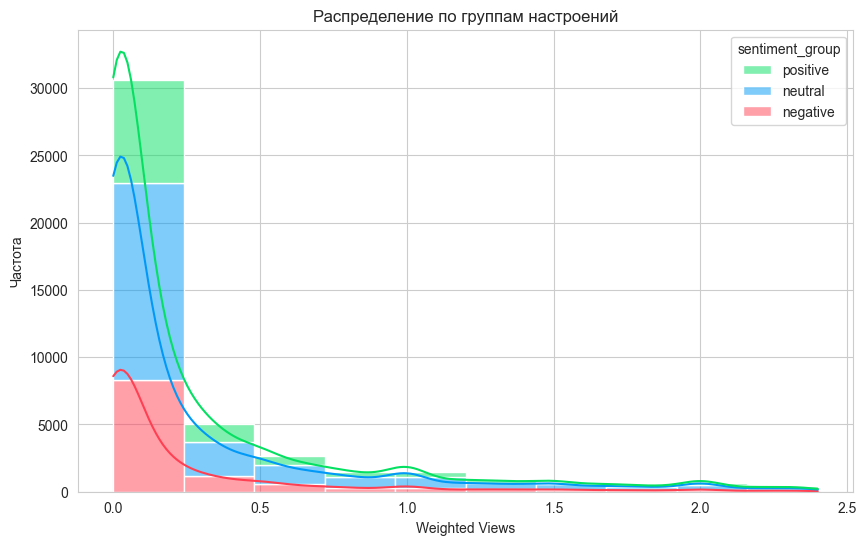

In [341]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_hui, x='activity', hue='sentiment_group', palette=['#04E061', '#0099F7', '#FF4053'], kde=True,
             bins=10, multiple='stack')
plt.title('Распределение по группам настроений')
plt.xlabel('Weighted Views')
plt.ylabel('Частота')
plt.show()

In [342]:
df.groupby('sentiment_group').describe()

Unnamed: 0                                                    \
                     count     mean          std      min       25%      50%   
sentiment_group                                                                
negative           12494.0  43725.5  3606.851466  37479.0  40602.25  43725.5   
neutral            24981.0  24988.0  7211.537873  12498.0  18743.00  24988.0   
positive           12498.0   6248.5  3608.006167      0.0   3124.25   6248.5   

                                   days_active             ...  \
                      75%      max       count       mean  ...   
sentiment_group                                            ...   
negative         46848.75  49972.0     12494.0  18.389547  ...   
neutral          31233.00  37478.0     24981.0  17.857171  ...   
positive          9372.75  12497.0     12498.0  18.100016  ...   

                sentiment_square           check_gr                         \
                             75%       max    count    mean       std  min   
sentiment_group                                                              
negative                0.031982  0.799479  12494.0  0.0000  0.000000  0.0   
neutral                 0.005910  0.022843  24981.0  0.9998  0.577223  0.0   
positive                0.176695  1.000000  12498.0  2.0000  0.000000  2.0   

                                     
                 25%  50%  75%  max  
sentiment_group                      
negative         0.0  0.0  0.0  0.0  
neutral          1.0  1.0  1.0  2.0  
positive         2.0  2.0  2.0  2.0  

[3 rows x 120 columns]

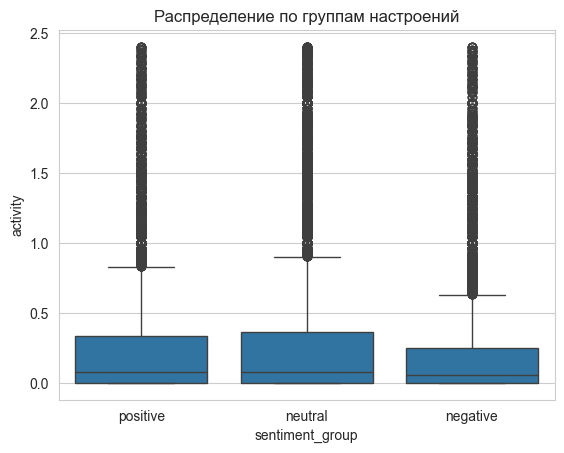

In [343]:
sns.boxplot(x='sentiment_group', y='activity', data=df_hui)
plt.title('Распределение по группам настроений')
plt.show()

In [344]:
from scipy.stats import rankdata

In [345]:
def check_reliability(df):
    print(df['sentiment_group'].value_counts())

    for group in df['sentiment_group'].unique():
        stat, p_value = stats.shapiro(df[df['sentiment_group'] == group]['activity'])
        print(f'Группа {group}: p-значение = {p_value}')

    if p_value > 0.05:
        print('Не отвергаем нулевую гипотезу: распределение нормальное.')
    else:
        print('Отвергаем нулевую гипотезу: распределение ненормальное.')

    normal_distribution = all([
        stats.shapiro(df[df['sentiment_group'] == group]['activity'])[1] > 0.05
        for group in df['sentiment_group'].unique()
    ])

    if normal_distribution:
        print('Используем ANOVA.')
        anova_result = stats.f_oneway(
            df[df['sentiment_group'] == 'negative']['activity'],
            df[df['sentiment_group'] == 'neutral']['activity'],
            df[df['sentiment_group'] == 'positive']['activity']
        )
        print('p-значение ANOVA:', anova_result.pvalue)
    else:
        print('Используем тест Краскала-Уоллиса.')
        kruskal_result = stats.kruskal(
            df[df['sentiment_group'] == 'negative']['activity'],
            df[df['sentiment_group'] == 'neutral']['activity'],
            df[df['sentiment_group'] == 'positive']['activity']
        )
        print()
        print('p-значение теста Краскала-Уоллиса:', kruskal_result.pvalue)

    alpha = 0.05

    if 'anova_result' in locals():
        if anova_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    if 'kruskal_result' in locals():
        if kruskal_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
            df_for_dunn = df[['sentiment_group', 'activity']]
            dunn_result = sp.posthoc_dunn(df_for_dunn, val_col='activity', group_col='sentiment_group',
                                          p_adjust='bonferroni')
            print("\nРезультаты теста Дънна (с поправкой Бонферрони):")
            print(dunn_result)
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    def rank_mean(sample):

        ranks = rankdata(sample)

        return np.mean(ranks)

    def addlabels(x, y):
        for i in range(len(x)):
            plt.text(i, y[i] // 2, y[i], ha='center')

    hui = []
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 10)
    for i in ['negative', 'neutral', 'positive']:
        rank_avg = rank_mean(df[df['sentiment_group'] == i]['activity'])
        hui.append(rank_avg)
        print(f"Ранговое среднее для группы {i}: {rank_avg}")

    ax.bar(['negative', 'neutral', 'positive'], hui, data=hui, color='#0099f7')
    addlabels(['negative', 'neutral', 'positive'], hui)
    plt.show()

    # pairs = [('negative', 'neutral'), ('negative', 'positive'), ('neutral', 'positive')]
    # results = []

    # for group1, group2 in pairs:
    #     stat, p = mannwhitneyu(df[df['sentiment_group'] == group1]['activity'], df[df['sentiment_group'] == group2]['activity'])
    #     results.append({'group1': group1, 'group2': group2, 'p-value': p})

    # p_values = [result['p-value'] for result in results]
    # adjusted_p = multipletests(p_values, method='bonferroni')[1]

    # for i, result in enumerate(results):
    #     result['p-adj'] = adjusted_p[i]
    #     result['reject'] = result['p-adj'] < alpha
    #     print(f"Группа 1: {result['group1']}, Группа 2: {result['group2']}, "
    #       f"p-value: {result['p-value']}, p-adj: {result['p-adj']}, "
    #       f"Отклонить нулевую гипотезу: {result['reject']}")

In [346]:
tertiles = df['sentiment'].quantile([0.33, 0.67])


def categorize_sentiment(x):
    if x <= tertiles[0.33]:
        return 'negative'
    elif x <= tertiles[0.67]:
        return 'neutral'
    else:
        return 'positive'


df['sentiment_newgroup'] = df['sentiment'].apply(categorize_sentiment)

In [347]:
neu = df[df['sentiment_newgroup'] == 'neutral']
neu['sentiment'].describe()

count    16990.000000
mean         0.031510
std          0.034094
min         -0.023126
25%          0.002629
50%          0.027281
75%          0.059116
max          0.099878
Name: sentiment, dtype: float64

In [348]:
df['sentiment_newgroup'].value_counts()
df['sentiment_newgroup'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [349]:
def check_reliabilitynew(df):
    print(df['sentiment_newgroup'].value_counts())

    for group in df['sentiment_newgroup'].unique():
        stat, p_value = stats.shapiro(df[df['sentiment_newgroup'] == group]['activity'])
        print(f'Группа {group}: p-значение = {p_value}')

    if p_value > 0.05:
        print('Не отвергаем нулевую гипотезу: распределение нормальное.')
    else:
        print('Отвергаем нулевую гипотезу: распределение ненормальное.')

    normal_distribution = all([
        stats.shapiro(df[df['sentiment_newgroup'] == group]['activity'])[1] > 0.05
        for group in df['sentiment_newgroup'].unique()
    ])

    if normal_distribution:
        print('Используем ANOVA.')
        anova_result = stats.f_oneway(
            df[df['sentiment_newgroup'] == 'negative']['activity'],
            df[df['sentiment_newgroup'] == 'neutral']['activity'],
            df[df['sentiment_newgroup'] == 'positive']['activity']
        )
        print('p-значение ANOVA:', anova_result.pvalue)
    else:
        print('Используем тест Краскала-Уоллиса.')
        kruskal_result = stats.kruskal(
            df[df['sentiment_newgroup'] == 'negative']['activity'],
            df[df['sentiment_newgroup'] == 'neutral']['activity'],
            df[df['sentiment_newgroup'] == 'positive']['activity']
        )
        print()
        print('p-значение теста Краскала-Уоллиса:', kruskal_result.pvalue)

    alpha = 0.05

    if 'anova_result' in locals():
        if anova_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    if 'kruskal_result' in locals():
        if kruskal_result.pvalue < alpha:
            print('Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).')
            df_for_dunn = df[['sentiment_newgroup', 'activity']]
            dunn_result = sp.posthoc_dunn(df_for_dunn, val_col='activity', group_col='sentiment_newgroup',
                                          p_adjust='bonferroni')
            print("\nРезультаты теста Дънна (с поправкой Бонферрони):")
            print(dunn_result)
        else:
            print('Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).')

    def rank_mean(sample):

        ranks = rankdata(sample)

        return np.mean(ranks)

    def addlabels(x, y):
        for i in range(len(x)):
            plt.text(i, y[i] // 2, y[i], ha='center')

    hui = []
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 10)
    for i in ['negative', 'neutral', 'positive']:
        rank_avg = rank_mean(df[df['sentiment_newgroup'] == i]['activity'])
        hui.append(rank_avg)
        print(f"Ранговое среднее для группы {i}: {rank_avg}")

    ax.bar(['negative', 'neutral', 'positive'], hui, data=hui, color='#0099f7')
    addlabels(['negative', 'neutral', 'positive'], hui)
    plt.show()

sentiment_newgroup
neutral     16990
negative    16492
positive    16491
Name: count, dtype: int64
Группа positive: p-значение = 2.2896695272482036e-124
Группа neutral: p-значение = 3.428445026063009e-124
Группа negative: p-значение = 4.3714163170208476e-123
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 3.712235620553892e-44
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  2.737883e-44  3.632560e-17
neutral   2.737883e-44  1.000000e+00  1.762944e-07
positive  3.632560e-17  1.762944e-07  1.000000e+00
Ранговое среднее для группы negative: 8246.5
Ранговое среднее для группы neutral: 8495.5
Ранговое среднее для группы positive: 8246.0


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16491.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16990.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16492.
  res = hypotest_fun_out(*samples, **kwds)


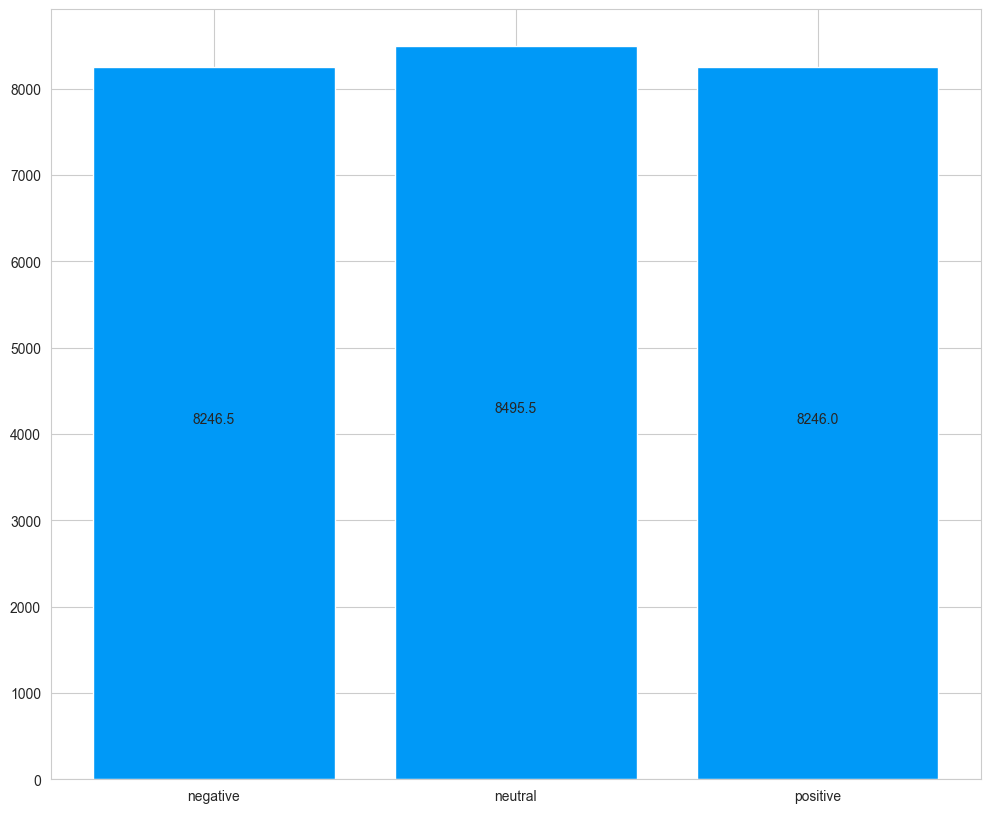

In [350]:
check_reliabilitynew(df)

In [351]:
# check_reliability(df)

In [352]:
df_cats = df[df['category'] == 'Кошки']
df_dogs = df[df['category'] == 'Собаки']
df_cats

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square,check_gr,sentiment_newgroup
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,5,3,4,1.000000,0.28,positive,0.0784,1.000000,2,positive
1,1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,655,0,0,0.999089,0.00,positive,0.0000,0.998179,2,positive
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,0,0,0,0.997077,0.00,positive,0.0000,0.994163,2,positive
3,3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,-1,1,1,0.997066,0.08,positive,0.0064,0.994141,2,positive
4,4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,8000,0,0,0.995826,0.00,positive,0.0000,0.991670,2,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135,0,negative
49969,49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433,0,negative
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,0,0,1,-0.714857,0.50,negative,0.2500,0.511020,0,negative
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,0,0,0,-0.876198,0.00,negative,0.0000,0.767724,0,negative


In [353]:
# check_reliability(df_cats)

In [354]:
# check_reliability(df_dogs)

In [410]:
df_free = df[(df['price'] >= 0) & (df['price'] <= 10)]
df_hahapay = df[(df['price'] == -1) | (df['price'] > 10)]
df_free

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,age,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square,cost
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,4.0,5,3,4,1.000000,0.280000,positive,0.078400,1.000000,free
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,36.0,0,0,0,0.997077,0.000000,positive,0.000000,0.994163,free
6,6,Кошки,25,False,5,Котёнок девочка 4 мес,21,14,2,Красивый окрас,...,4.0,0,1,0,0.994940,0.040000,positive,0.001600,0.989905,free
8,8,Кошки,1,False,1,"Котик 2,5 мес в добрые руки",27,15,2,Отличный парень,...,2.5,0,0,0,0.993008,0.000000,positive,0.000000,0.986066,free
12,12,Кошки,25,False,2,Котёнок,7,50,6,милый котёнок❤️мальчик!\n3 месяца\nв хорошие р...,...,3.0,0,1,1,0.984844,0.080000,positive,0.006400,0.969917,free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49959,49959,Кошки,24,False,1,Европейская кошка,17,215,30,Умная спокойная аккуратная кошка живёт в зоома...,...,NaN,1,2,1,-0.594563,0.125000,negative,0.015625,0.353505,free
49963,49963,Кошки,7,False,5,Кошка,5,225,30,"Симпатичная кошка ищет дом, уже 2 месяца живёт...",...,2.0,0,0,1,-0.629927,0.142857,negative,0.020408,0.396808,free
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,36.0,0,0,1,-0.714857,0.500000,negative,0.250000,0.511020,free
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,108.0,0,0,0,-0.876198,0.000000,negative,0.000000,0.767724,free


In [411]:
df.columns

Index(['Unnamed: 0', 'category', 'days_active', 'has_video', 'photo_count',
       'title', 'title_length', 'description_length', 'description_word_count',
       'DescriptionRu', 'breed', 'gender', 'age', 'price', 'contacts',
       'favorites', 'sentiment', 'activity', 'sentiment_group',
       'activity_square', 'sentiment_square', 'cost'],
      dtype='object')

In [412]:
df['age'].describe()

count    41466.000000
mean        17.184472
std         29.041944
min          0.000000
25%          3.000000
50%          6.000000
75%         19.150000
max        324.000000
Name: age, dtype: float64

In [413]:
df_young = df[df['age'] <= 6]
df_old = df[df['age'] > 6]


In [414]:
df['title_length'].describe()

count    49973.000000
mean        20.072319
std         10.360676
min          3.000000
25%         13.000000
50%         19.000000
75%         27.000000
max         50.000000
Name: title_length, dtype: float64

In [415]:
df_small = df[df['title_length'] < 20]
df_big = df[df['title_length'] >= 20]

sentiment_group
neutral     24893
positive     2389
negative      763
Name: count, dtype: int64
Группа positive: p-значение = 3.0598320957450448e-74
Группа neutral: p-значение = 2.8989371367631007e-137
Группа negative: p-значение = 2.2274272056376152e-49
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 0.0007820391789874337
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
          negative   neutral  positive
negative  1.000000  0.294629  0.004605
neutral   0.294629  1.000000  0.002768
positive  0.004605  0.002768  1.000000
Ранговое среднее для группы negative: 382.0
Ранговое среднее для группы neutral: 12447.0
Ранговое среднее для группы positive: 1195.0


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24893.
  res = hypotest_fun_out(*samples, **kwds)


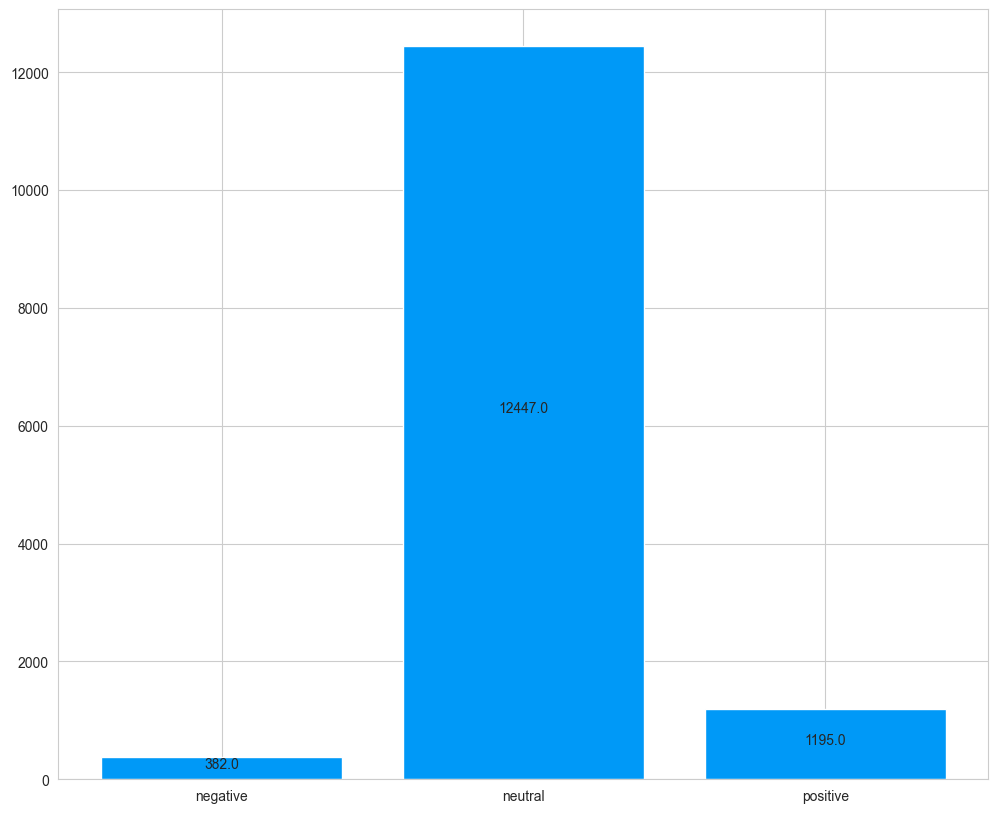

In [447]:
check_reliability(df_free)

In [417]:

# check_reliability(df_hahapay)

In [418]:
df_male = df[df['gender'] == 'М']
df_female = df[df['gender'] == 'Ж']

In [419]:
# check_reliability(df)

In [420]:
# check_reliability(df_female)

sentiment_newgroup
positive    9980
negative    8888
neutral     8346
Name: count, dtype: int64
Группа positive: p-значение = 7.167689431223815e-111
Группа neutral: p-значение = 3.723383163254115e-105
Группа negative: p-значение = 1.9316828272044806e-106
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 6.882123286166875e-24
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  1.439275e-15  2.051343e-21
neutral   1.439275e-15  1.000000e+00  7.950974e-01
positive  2.051343e-21  7.950974e-01  1.000000e+00
Ранговое среднее для группы negative: 4444.5
Ранговое среднее для группы neutral: 4173.5
Ранговое среднее для группы positive: 4990.5


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9980.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8346.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8888.
  res = hypotest_fun_out(*samples, **kwds)


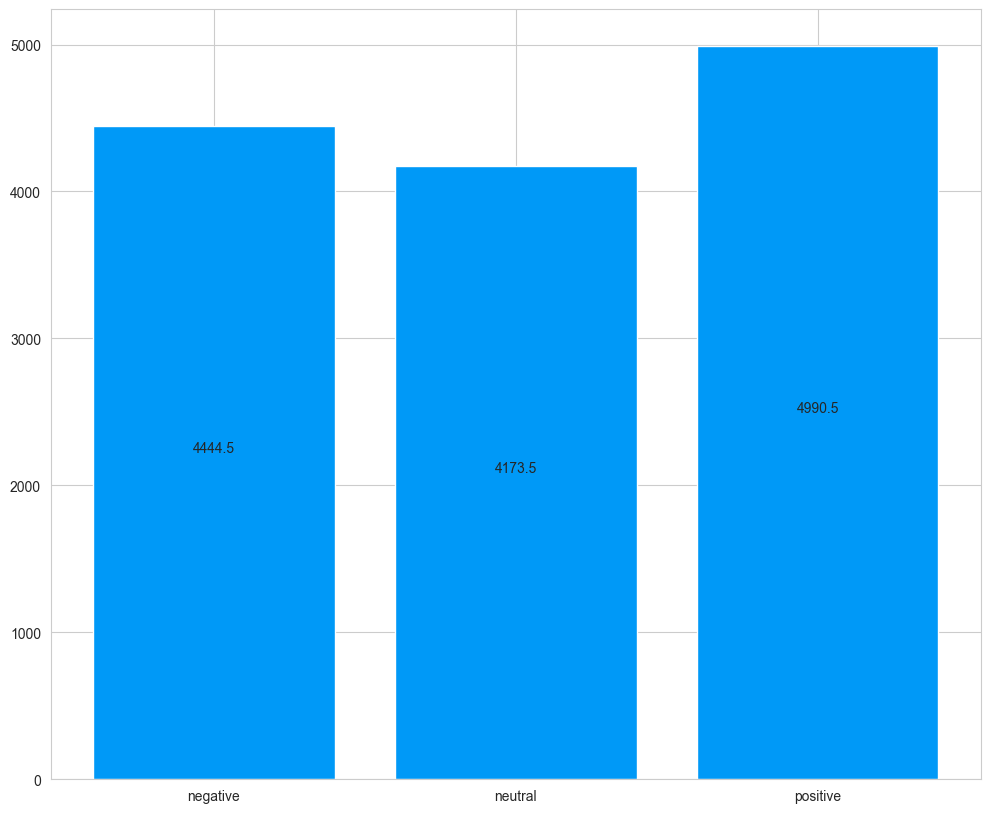

In [421]:
check_reliabilitynew(df_cats)

sentiment_newgroup
neutral     8644
negative    7604
positive    6511
Name: count, dtype: int64
Группа positive: p-значение = 6.652370734083799e-97
Группа neutral: p-значение = 5.273657670600644e-104
Группа negative: p-значение = 3.3633288522828417e-100
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 2.823278997842659e-23
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  1.331037e-23  2.010885e-04
neutral   1.331037e-23  1.000000e+00  6.593865e-08
positive  2.010885e-04  6.593865e-08  1.000000e+00
Ранговое среднее для группы negative: 3802.5
Ранговое среднее для группы neutral: 4322.5
Ранговое среднее для группы positive: 3256.0


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6511.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8644.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7604.
  res = hypotest_fun_out(*samples, **kwds)


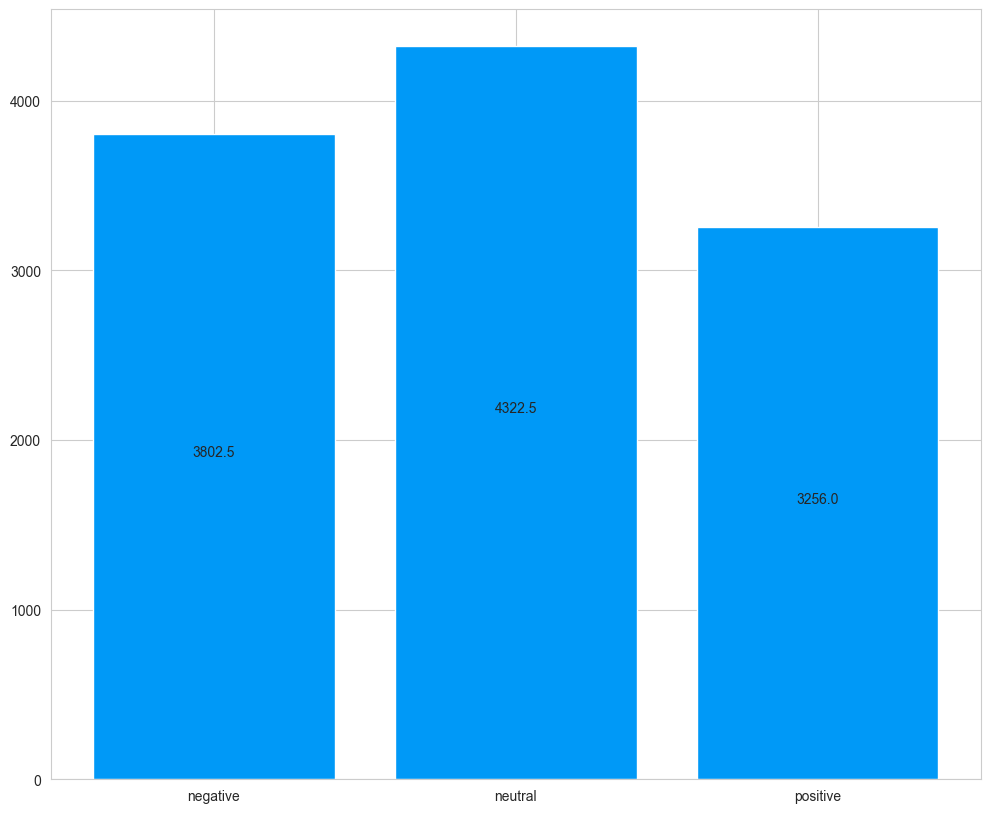

In [422]:
check_reliabilitynew(df_dogs)

In [448]:
check_reliabilitynew(df_free)

KeyError: 'sentiment_newgroup'

In [ ]:
check_reliabilitynew(df_hahapay)

In [ ]:
df_photos = df[df['photo_count'] < 4]
df_more_photos = df[df['photo_count'] >= 4]

In [ ]:
check_reliabilitynew(df_photos)

In [ ]:
check_reliabilitynew(df_more_photos)

In [ ]:
check_reliabilitynew(df_male)

In [ ]:
check_reliabilitynew(df_female)

In [424]:
check_reliabilitynew(df_small)

KeyError: 'sentiment_newgroup'

In [ ]:
check_reliabilitynew(df_big)

In [425]:
check_reliabilitynew(df_young)

KeyError: 'sentiment_newgroup'

In [ ]:
check_reliabilitynew(df_old)

In [426]:
df

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,age,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square,cost
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,4.0,5,3,4,1.000000,0.28,positive,0.0784,1.000000,free
1,1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,NaN,655,0,0,0.999089,0.00,positive,0.0000,0.998179,not-free
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,36.0,0,0,0,0.997077,0.00,positive,0.0000,0.994163,free
3,3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,NaN,-1,1,1,0.997066,0.08,positive,0.0064,0.994141,not-free
4,4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,NaN,8000,0,0,0.995826,0.00,positive,0.0000,0.991670,not-free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,48.0,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135,not-free
49969,49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,NaN,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433,not-free
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,36.0,0,0,1,-0.714857,0.50,negative,0.2500,0.511020,free
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,108.0,0,0,0,-0.876198,0.00,negative,0.0000,0.767724,free


# Проверка

In [427]:
from matplotlib.patches import ConnectionPatch




def pie_segment(df, s, p):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
    fig.subplots_adjust(wspace=0)
    labels = list(df[s].unique())
    labels.remove(p)
    explode = [0.1] + [0] * len(labels)
    labels = [p] + labels
    overall_ratios = [int(df[df[s] == label].shape[0]) for label in labels]
    df_p = df[df[s] == labels[0]]
    angle = 270
    wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                         labels=labels, explode=explode, colors=['#04E061', '#DDDDDD'])
    age_ratios = [int(df_p[df_p['sentiment_group'] == el].shape[0]) for el in ['negative', 'neutral', 'positive']]
    print(age_ratios)
    age_labels = ['negative', 'neutral', 'positive']
    bottom = 1
    width = .2
    colors = ['#0099F7', '#9363E8', '#FF4053']
    # Adding from the top matches the legend.
    for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
        bottom -= height
        bc = ax2.bar(0, height, width, color = colors[j], bottom=bottom, label=label,
                     alpha=1)
        ax2.bar_label(bc, labels=[f"{round(height / overall_ratios[0] * 100, 2)}%"], label_type='center')
    
    
    ax2.legend()
    ax2.axis('off')
    ax2.set_xlim(- 2.5 * width, 2.5 * width)
    '''
    # use ConnectionPatch to draw lines between the two plots
    theta1, theta2 = wedges[0].theta1, wedges[0].theta2
    center, r = wedges[0].center, wedges[0].r
    bar_height = sum(age_ratios)
    # draw top connecting line
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = r * np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(4)
    ax2.add_artist(con)
    
    # draw bottom connecting line
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = r * np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    ax2.add_artist(con)
    con.set_linewidth(4)
    '''

    plt.show()

In [428]:
df

,Unnamed: 0,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,...,age,price,contacts,favorites,sentiment,activity,sentiment_group,activity_square,sentiment_square,cost
0,0,Кошки,25,False,2,"Отдам котиков, в хорошие руки 4 мес",35,8,1,Красавцы,...,4.0,5,3,4,1.000000,0.28,positive,0.0784,1.000000,free
1,1,Кошки,25,False,1,Бенгальская кошка,17,5,1,Супер,...,NaN,655,0,0,0.999089,0.00,positive,0.0000,0.998179,not-free
2,2,Кошки,11,False,5,Кот 3 года вислоухий,20,20,4,Кот красавец 3 года,...,36.0,0,0,0,0.997077,0.00,positive,0.0000,0.994163,free
3,3,Кошки,25,False,1,Сибирская кошка,15,16,3,Красавица в дом!,...,NaN,-1,1,1,0.997066,0.08,positive,0.0064,0.994141,not-free
4,4,Кошки,25,False,4,Кошки мейн-кун,14,21,3,Хорошая милая кошечка,...,NaN,8000,0,0,0.995826,0.00,positive,0.0000,0.991670,not-free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,49968,Кошки,25,False,10,Шотландская вислоухая кошка,27,146,24,"Кошке 4 года, не стерилизованная, ни разу не к...",...,48.0,3000,1,1,-0.673896,0.08,negative,0.0064,0.454135,not-free
49969,49969,Кошки,25,False,2,Британская вислоухая,20,100,22,Девочка. Уже больше года. У ребенка оказалась ...,...,NaN,1500,1,3,-0.710234,0.16,negative,0.0256,0.504433,not-free
49970,49970,Кошки,2,False,4,Красивые здоровые кот и кошка 3 года,36,216,26,"Умерла хозяйка, бабушка, кошки никому не нужны...",...,36.0,0,0,1,-0.714857,0.50,negative,0.2500,0.511020,free
49971,49971,Кошки,25,False,2,Кошка в дар бесплатно,21,50,11,без домная кошка мне 9 лет и мне очень жалко к...,...,108.0,0,0,0,-0.876198,0.00,negative,0.0000,0.767724,free


In [429]:
df = df.assign(cost=lambda x: x['price'].apply(lambda y: 'free' if 0 <= y <= 10 else 'not-free'))


sentiment_group
neutral     44776
positive     4072
negative     1125
Name: count, dtype: int64
Группа positive: p-значение = 1.7966174748222438e-87
Группа neutral: p-значение = 1.431682840351649e-152
Группа negative: p-значение = 4.570613175811033e-57
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.5052714478636259e-10
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  1.174460e-10  7.149759e-07
neutral   1.174460e-10  1.000000e+00  3.609257e-01
positive  7.149759e-07  3.609257e-01  1.000000e+00
Ранговое среднее для группы negative: 563.0
Ранговое среднее для группы neutral: 22388.5
Ранговое среднее для группы positive: 2036.5


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44776.
  res = hypotest_fun_out(*samples, **kwds)


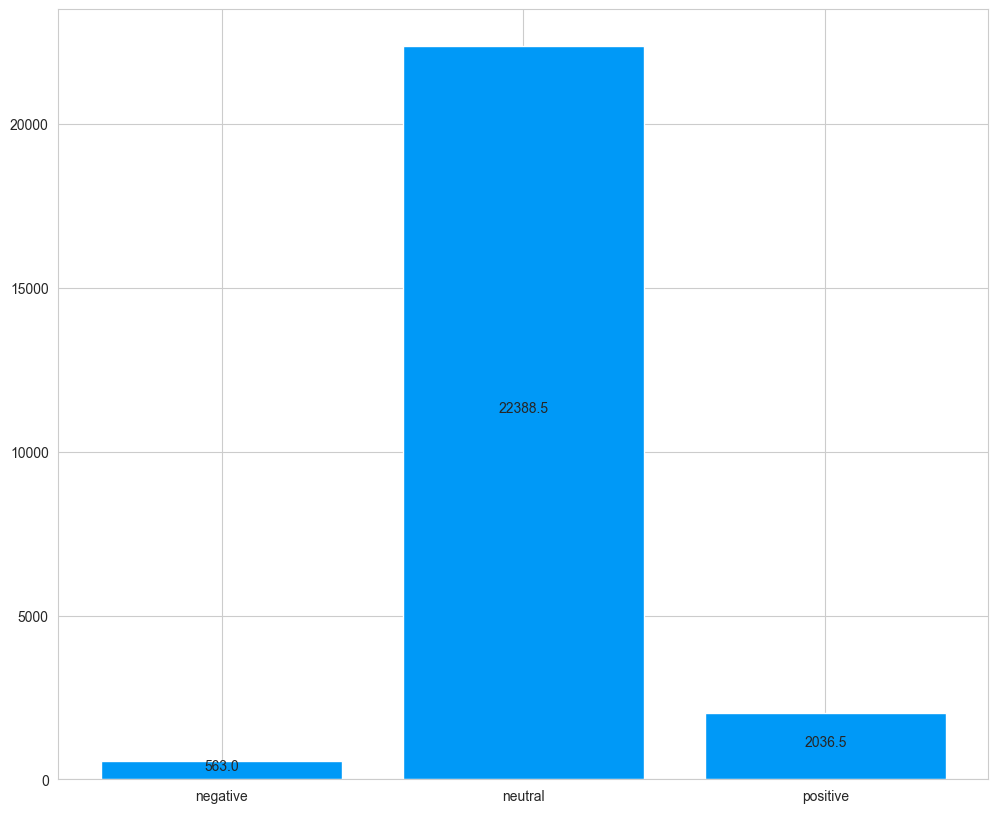

In [430]:
check_reliability(df)

[784, 23590, 2840]


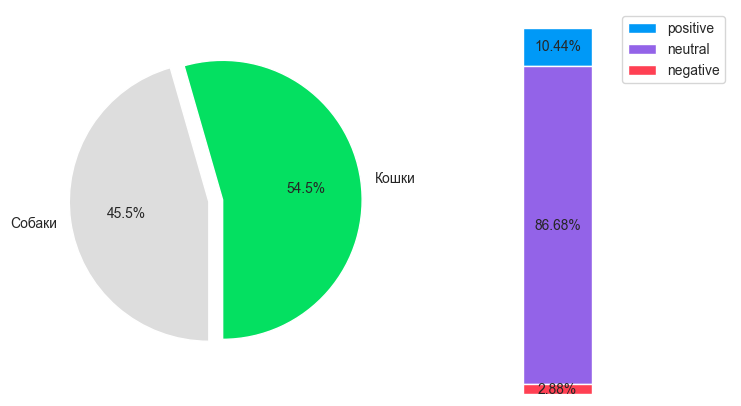

In [431]:
pie_segment(df, 'category', 'Кошки')

sentiment_group
neutral     12442
positive     7793
negative     6979
Name: count, dtype: int64
Группа positive: p-значение = 3.3328225112454944e-104
Группа neutral: p-значение = 4.699628708109515e-116
Группа negative: p-значение = 6.20378129029855e-100
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.9659456059897349e-22
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  1.590215e-17  2.448826e-19
neutral   1.590215e-17  1.000000e+00  4.473982e-01
positive  2.448826e-19  4.473982e-01  1.000000e+00
Ранговое среднее для группы negative: 3490.0
Ранговое среднее для группы neutral: 6221.5
Ранговое среднее для группы positive: 3897.0


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7793.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12442.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6979.
  res = hypotest_fun_out(*samples, **kwds)


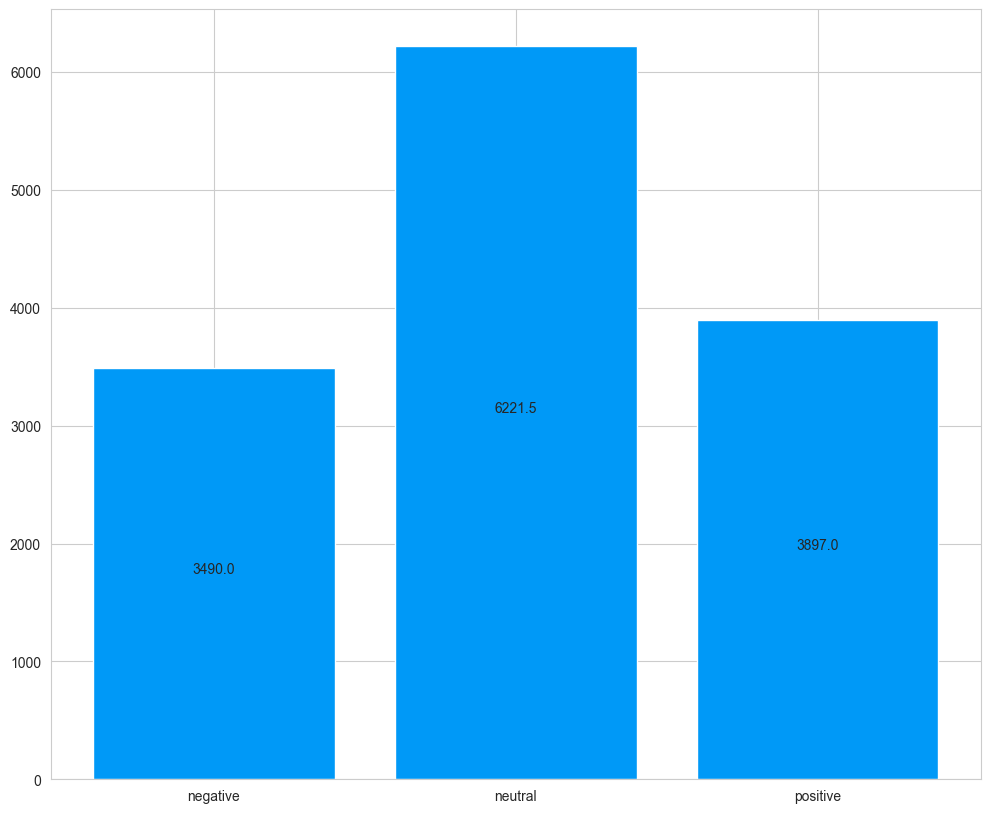

In [432]:
check_reliability(df_cats)

sentiment_group
neutral     12539
negative     5515
positive     4705
Name: count, dtype: int64
Группа positive: p-значение = 8.518152063871147e-89
Группа neutral: p-значение = 4.891981904036026e-114
Группа negative: p-значение = 4.588361944664398e-92
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 9.537604303663478e-27
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral      positive
negative  1.000000e+00  3.338364e-27  2.474257e-07
neutral   3.338364e-27  1.000000e+00  1.347294e-04
positive  2.474257e-07  1.347294e-04  1.000000e+00
Ранговое среднее для группы negative: 2758.0
Ранговое среднее для группы neutral: 6270.0
Ранговое среднее для группы positive: 2353.0


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12539.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5515.
  res = hypotest_fun_out(*samples, **kwds)


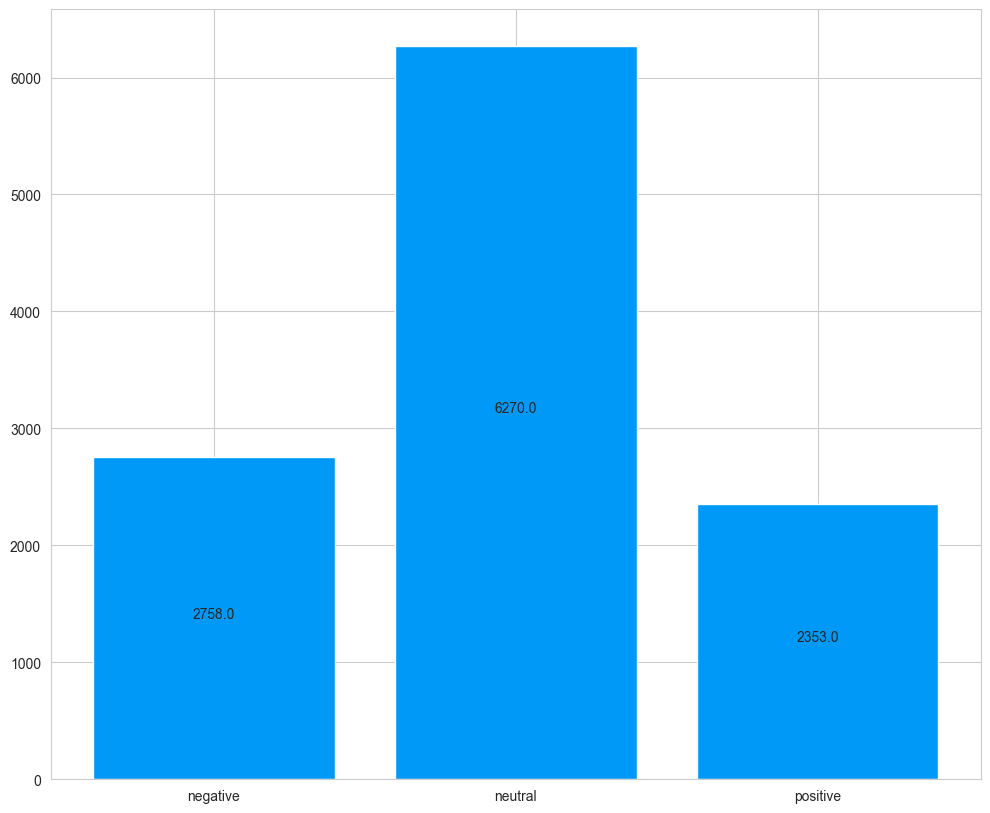

In [433]:
check_reliability(df_dogs)

[341, 21186, 1232]


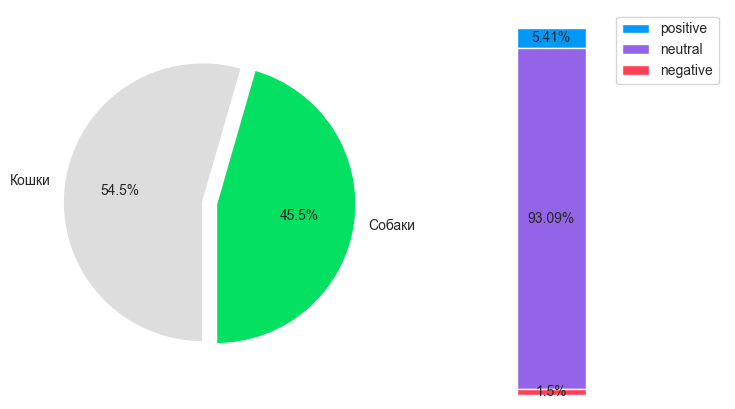

In [434]:
pie_segment(df, 'category', 'Собаки')

sentiment_group
neutral     24893
positive     2389
negative      763
Name: count, dtype: int64
Группа positive: p-значение = 3.0598320957450448e-74
Группа neutral: p-значение = 2.8989371367631007e-137
Группа negative: p-значение = 2.2274272056376152e-49
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 0.0007820391789874337
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
          negative   neutral  positive
negative  1.000000  0.294629  0.004605
neutral   0.294629  1.000000  0.002768
positive  0.004605  0.002768  1.000000
Ранговое среднее для группы negative: 382.0
Ранговое среднее для группы neutral: 12447.0
Ранговое среднее для группы positive: 1195.0


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24893.
  res = hypotest_fun_out(*samples, **kwds)


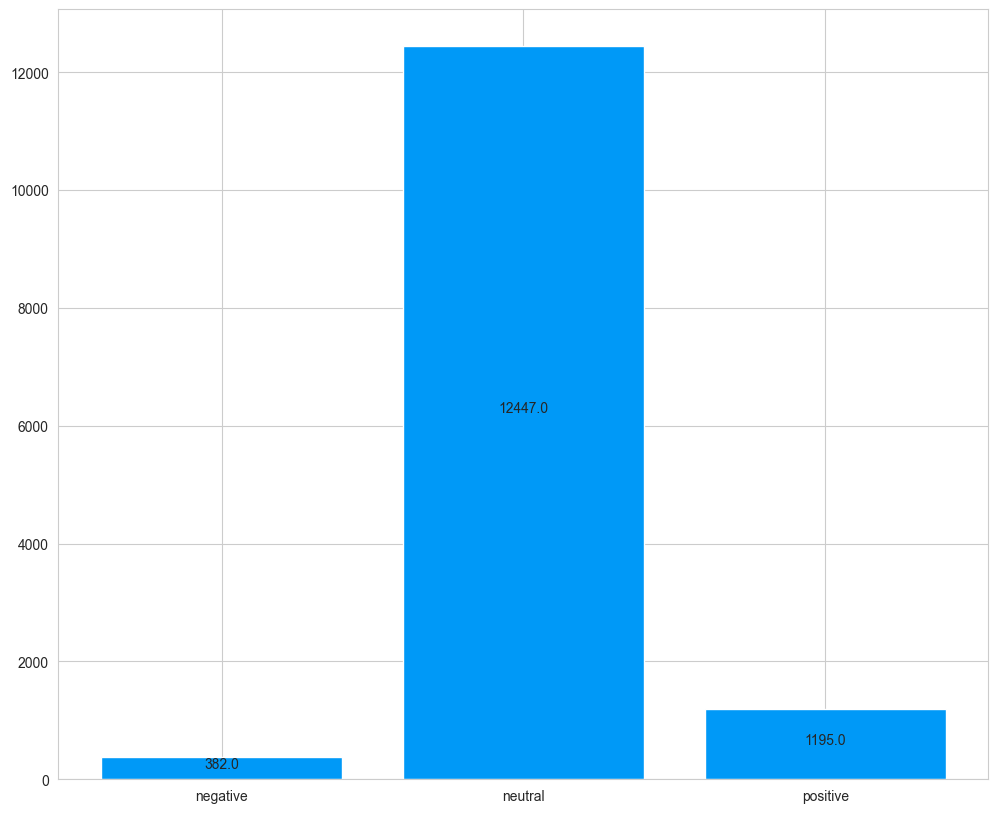

In [435]:
check_reliability(df_free)

[763, 24893, 2389]


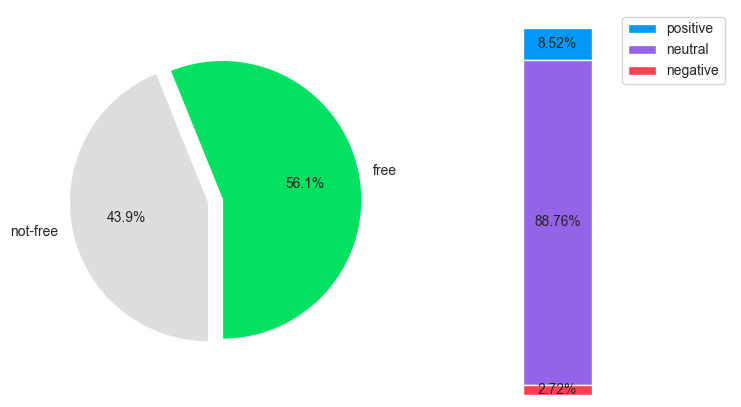

In [436]:
pie_segment(df, 'cost', 'free')

sentiment_group
neutral     19883
positive     1683
negative      362
Name: count, dtype: int64
Группа positive: p-значение = 1.6977348294893112e-66
Группа neutral: p-значение = 9.336410525745599e-126
Группа negative: p-значение = 2.819864730743573e-37
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 6.623851427007772e-14
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral  positive
negative  1.000000e+00  9.212429e-10  0.000787
neutral   9.212429e-10  1.000000e+00  0.000004
positive  7.866106e-04  4.279036e-06  1.000000
Ранговое среднее для группы negative: 181.5
Ранговое среднее для группы neutral: 9942.0
Ранговое среднее для группы positive: 842.0


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19883.
  res = hypotest_fun_out(*samples, **kwds)


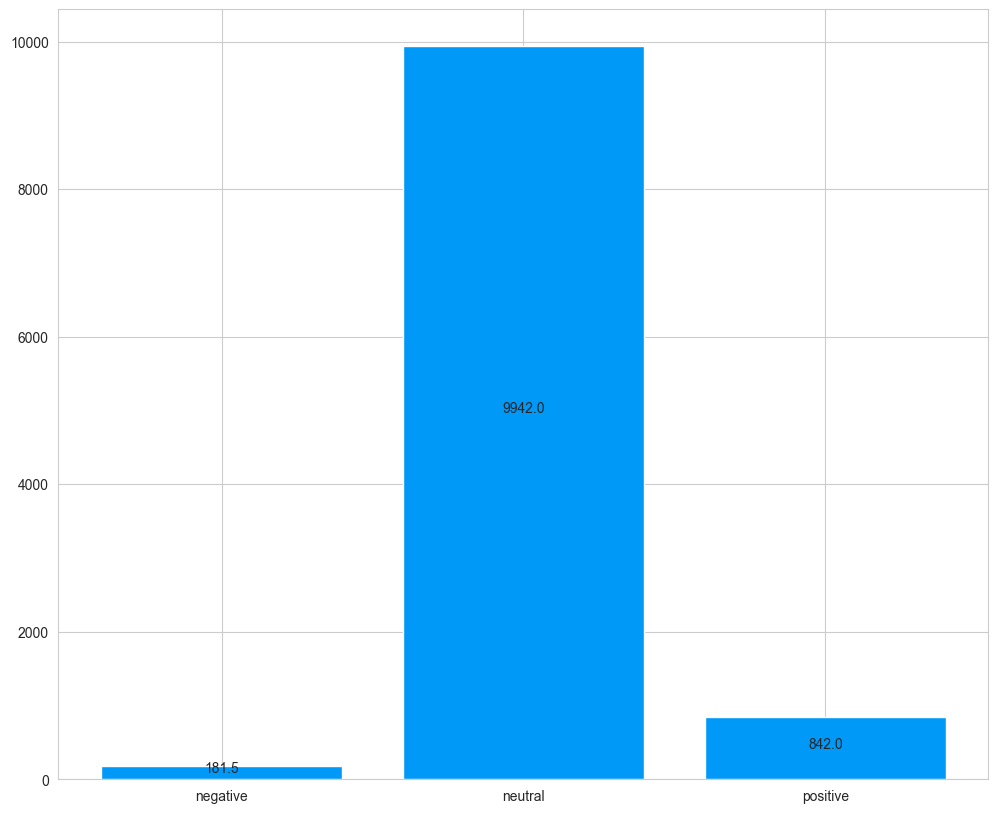

In [437]:
check_reliability(df_hahapay)

[362, 19883, 1683]


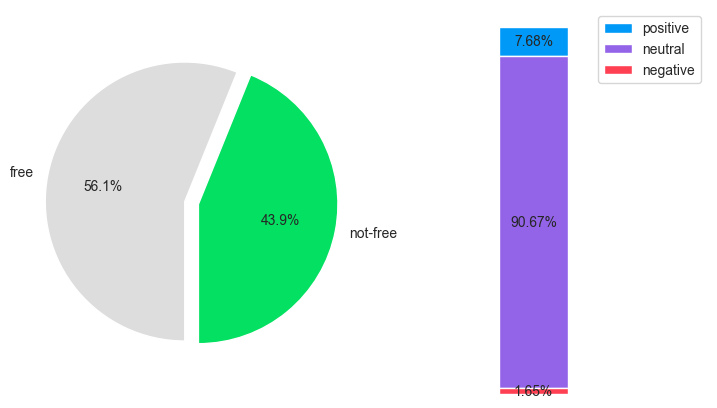

In [438]:
pie_segment(df, 'cost', 'not-free')

sentiment_group
neutral     19648
positive     2639
negative      244
Name: count, dtype: int64
Группа positive: p-значение = 3.4831814906935526e-77
Группа neutral: p-значение = 1.6273964452623532e-127
Группа negative: p-значение = 1.4356648899072752e-31
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 1.692184510461233e-08
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
          negative   neutral  positive
negative  1.000000  0.000036  0.011243
neutral   0.000036  1.000000  0.000066
positive  0.011243  0.000066  1.000000
Ранговое среднее для группы negative: 122.5
Ранговое среднее для группы neutral: 9824.5
Ранговое среднее для группы positive: 1320.0


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19648.
  res = hypotest_fun_out(*samples, **kwds)


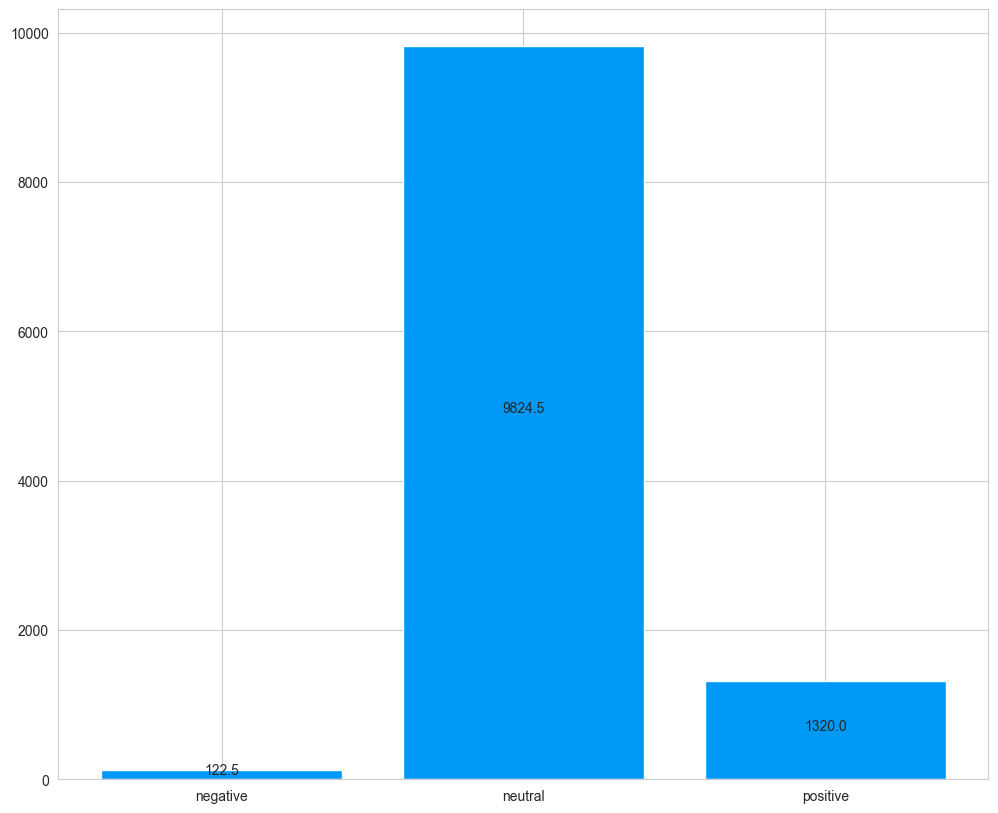

In [439]:
check_reliability(df_young)

sentiment_group
neutral     17400
positive      832
negative      703
Name: count, dtype: int64
Группа positive: p-значение = 8.19106884187139e-51
Группа neutral: p-значение = 2.57012870141376e-127
Группа negative: p-значение = 1.8765635241708315e-48
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 0.9064369951864921
Нет статистически значимого различия между группами (не отвергаем нулевую гипотезу).
Ранговое среднее для группы negative: 352.0
Ранговое среднее для группы neutral: 8700.5
Ранговое среднее для группы positive: 416.5


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17400.
  res = hypotest_fun_out(*samples, **kwds)


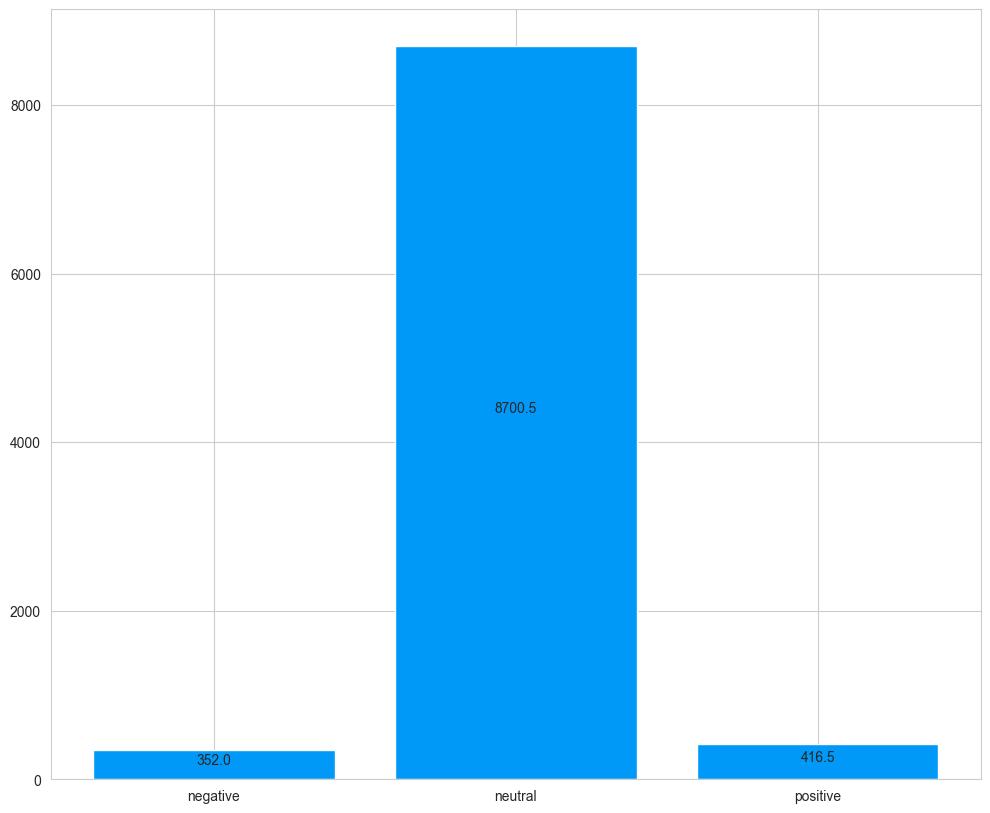

In [440]:
check_reliability(df_old)

sentiment_group
neutral     22571
positive     1939
negative      727
Name: count, dtype: int64
Группа positive: p-значение = 3.502308223057128e-70
Группа neutral: p-значение = 5.761080614423199e-133
Группа negative: p-значение = 4.2765229668134786e-49
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 2.877562904434658e-07
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
          negative   neutral  positive
negative  1.000000  0.000002  0.010630
neutral   0.000002  1.000000  0.031199
positive  0.010630  0.031199  1.000000
Ранговое среднее для группы negative: 364.0
Ранговое среднее для группы neutral: 11286.0
Ранговое среднее для группы positive: 970.0


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22571.
  res = hypotest_fun_out(*samples, **kwds)


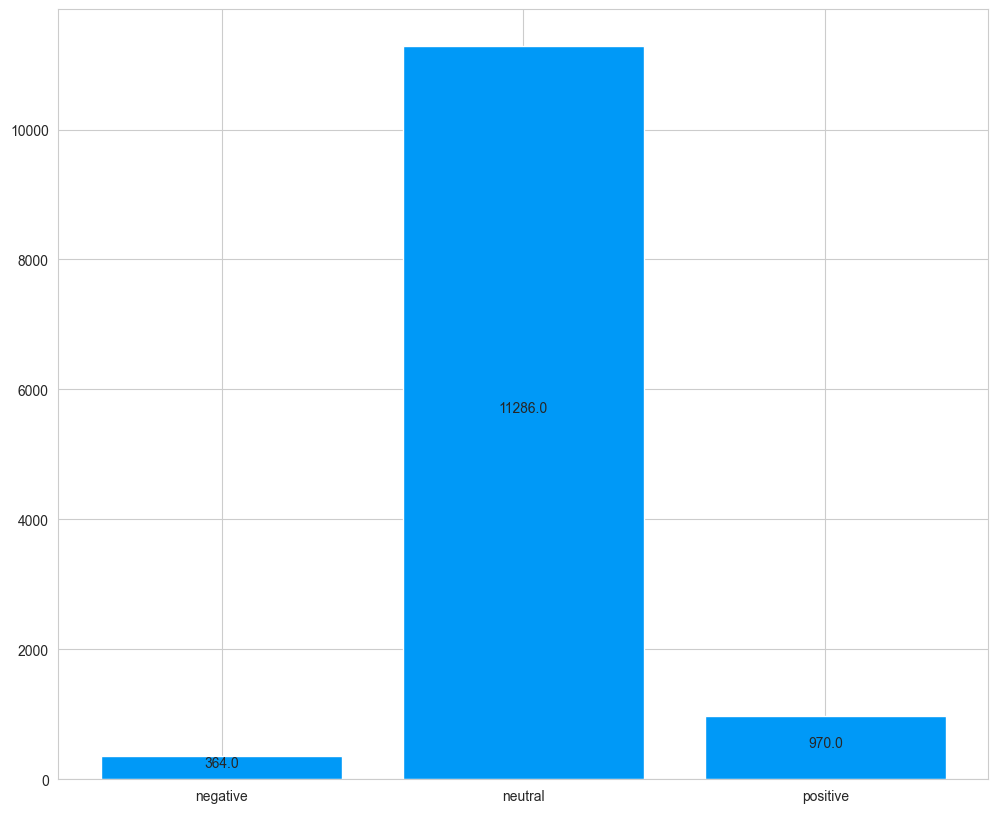

In [441]:
check_reliability(df_female)

[398, 22205, 2133]


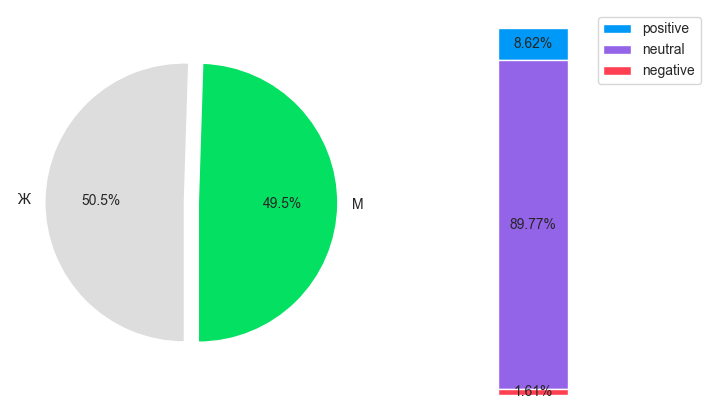

In [442]:
pie_segment(df, 'gender', 'М')

sentiment_group
neutral     22205
positive     2133
negative      398
Name: count, dtype: int64
Группа positive: p-значение = 2.668026409930185e-68
Группа neutral: p-значение = 3.7117684283387833e-131
Группа negative: p-значение = 6.040192050997673e-38
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 0.0016879341711438008
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
          negative  neutral  positive
negative  1.000000  0.00108  0.002625
neutral   0.001080  1.00000  1.000000
positive  0.002625  1.00000  1.000000
Ранговое среднее для группы negative: 199.5
Ранговое среднее для группы neutral: 11103.0
Ранговое среднее для группы positive: 1067.0


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22205.
  res = hypotest_fun_out(*samples, **kwds)


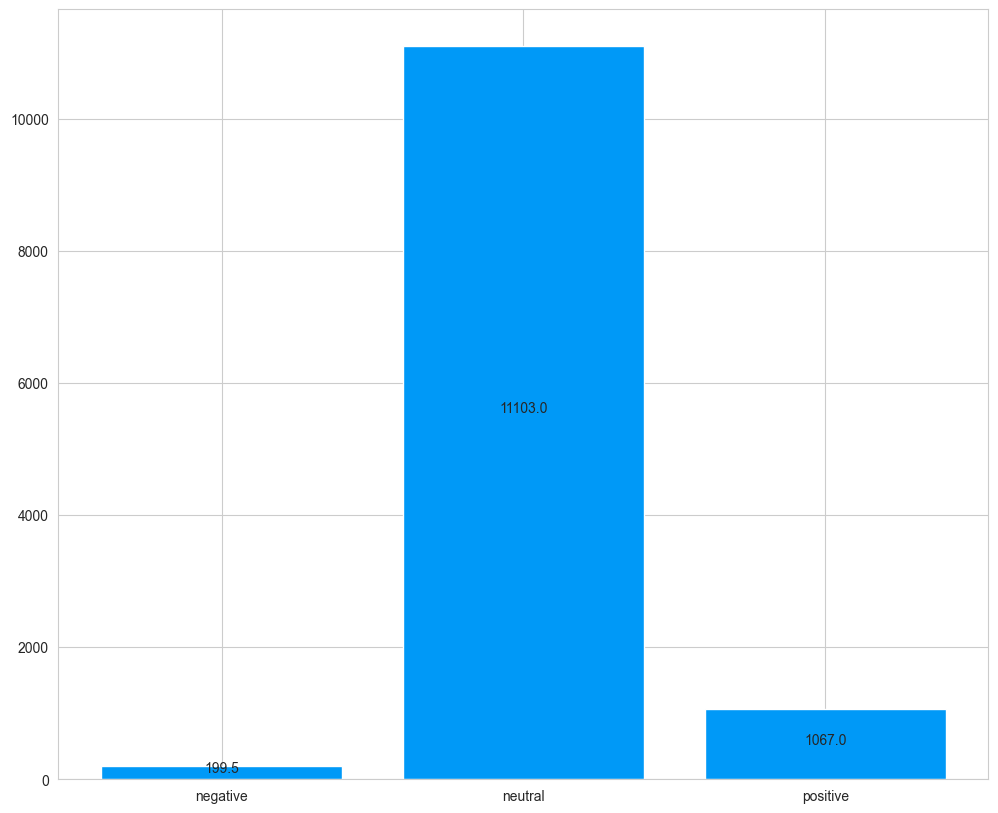

In [443]:
check_reliability(df_male)

[727, 22571, 1939]


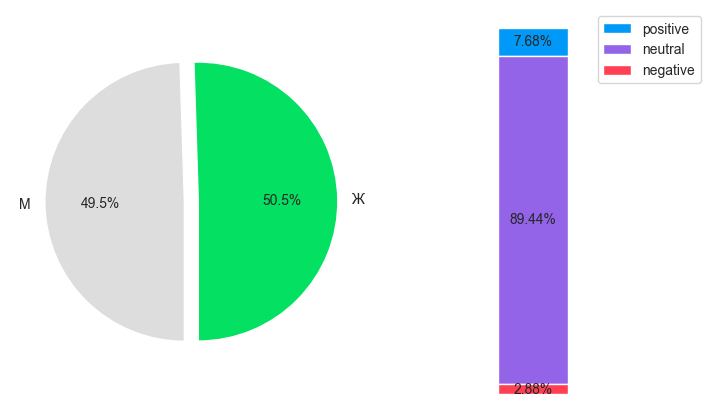

In [444]:
pie_segment(df, 'gender', 'Ж')

sentiment_group
neutral     22449
positive     2100
negative      598
Name: count, dtype: int64
Группа positive: p-значение = 1.9978145437248967e-69
Группа neutral: p-значение = 5.766104966939887e-132
Группа negative: p-значение = 2.691658244930022e-45
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 4.888864203272205e-08
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
              negative       neutral  positive
negative  1.000000e+00  1.245092e-07  0.000364
neutral   1.245092e-07  1.000000e+00  0.094457
positive  3.637009e-04  9.445676e-02  1.000000
Ранговое среднее для группы negative: 299.5
Ранговое среднее для группы neutral: 11225.0
Ранговое среднее для группы positive: 1050.5


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22449.
  res = hypotest_fun_out(*samples, **kwds)


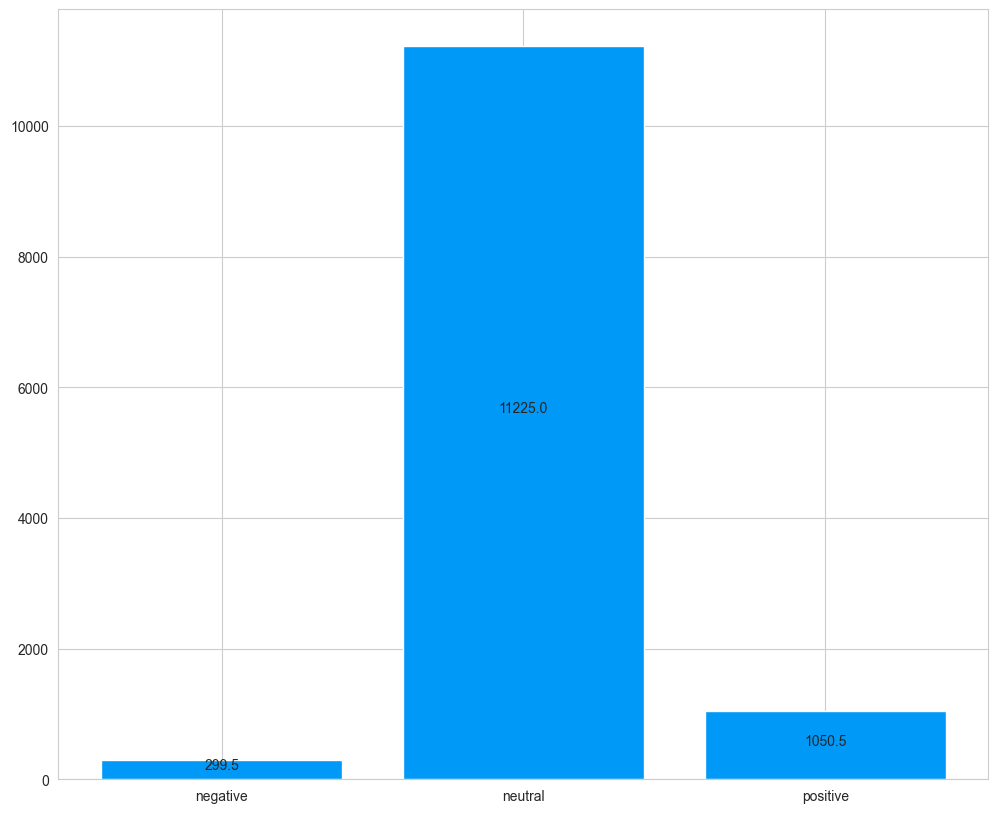

In [445]:
check_reliability(df_small)

sentiment_group
neutral     22327
positive     1972
negative      527
Name: count, dtype: int64
Группа positive: p-значение = 1.5944323154790016e-70
Группа neutral: p-значение = 3.7039912638275405e-132
Группа negative: p-значение = 5.0382727618740294e-43
Отвергаем нулевую гипотезу: распределение ненормальное.
Используем тест Краскала-Уоллиса.

p-значение теста Краскала-Уоллиса: 0.0006303666870831953
Существует статистически значимое различие между группами (отвергаем нулевую гипотезу).

Результаты теста Дънна (с поправкой Бонферрони):
          negative   neutral  positive
negative  1.000000  0.000375  0.001749
neutral   0.000375  1.000000  1.000000
positive  0.001749  1.000000  1.000000
Ранговое среднее для группы negative: 264.0
Ранговое среднее для группы neutral: 11164.0
Ранговое среднее для группы positive: 986.5


C:\Users\nikso\PycharmProProjects\Dano2024\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22327.
  res = hypotest_fun_out(*samples, **kwds)


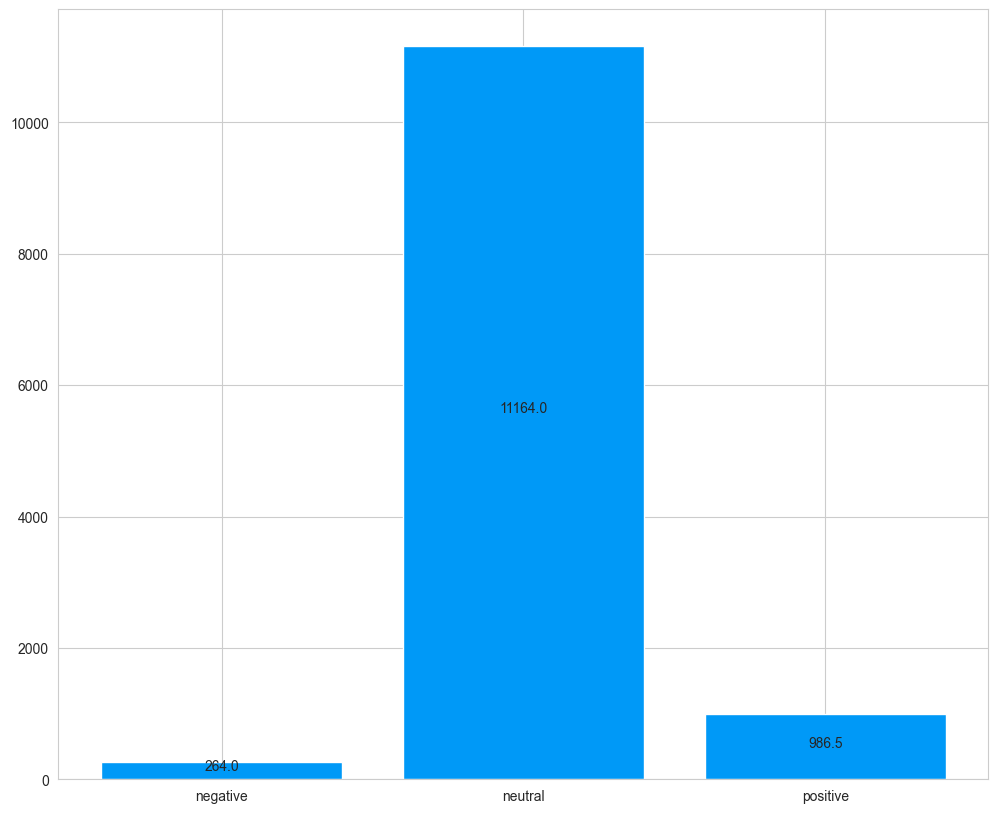

In [446]:
check_reliability(df_big)